# Missing Values

In our dataset, there are many missing values. Here we first find the distribution of all these columns.

In [3]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import ks_2samp, chi2_contingency

In [4]:
# First, we can see the missing rate of all these data
df = pd.read_csv("T2DM.csv")
# check the missing value for each of the data
missing_values_count = df.isnull().sum()
# Calculate the missing rate for each column
missing_rate = (missing_values_count / len(df)) * 100
missing_rate_table = pd.DataFrame({'Column': df.columns, 'Missing Rate (%)': missing_rate}).reset_index(drop=True)
print(missing_rate_table)

print(len(df))
print(len(df['ID'].unique()))
print(df['DM'].unique())
print(df["Age"].unique())

       Column  Missing Rate (%)
0          ID          0.000000
1          DM          0.000000
2         Age          0.000000
3     Smoking         33.863256
4     Alcohol         51.422424
5      Income         12.359551
6          PA         52.665551
7         BMI          4.315085
8        Race          0.000000
9         Edu         37.210136
10  Menopause          0.000000
11   Systolic         24.671289
12  Diastolic         24.671289
8366
8366
[2 3 1 9]
[ 2. 66. 18. 13. 75. 56. 67. 54. 71. 61. 22. 45.  1. 60. 64.  5.  9. 70.
 53. 42. 57. 20. 72. 11. 52.  8. 26. 10. 25.  7. 73. 63. 55. 44. 74. 40.
 19. 36. 80.  6.  3. 69. 41. 47. 32. 46. 21. 34. 31. 12. 62. 59. 14. 24.
 16. 58. 68. 38. 48. 35. 50. 28. 29. 43. 76. 37. 30. 27. 15. 39. 49. 33.
 23. 79.  4. 17. 78. 77. 51. 65.]


From the table above, we can see that ID is unique among all observations, which means each observation corresponds to a unique survey.
For the response (DM Condition), there are 4 possibilities (1 for yes, 2 for no, 3 for boarder line which is usually considered as yes, 9 for don't know)
For the age, everyone provides an age but some of them may be unreasonable.
Besides, race and manopause features are not missing. 
So, before we do the modeling, we need to deal with the missing value first.

c:\Users\75994\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


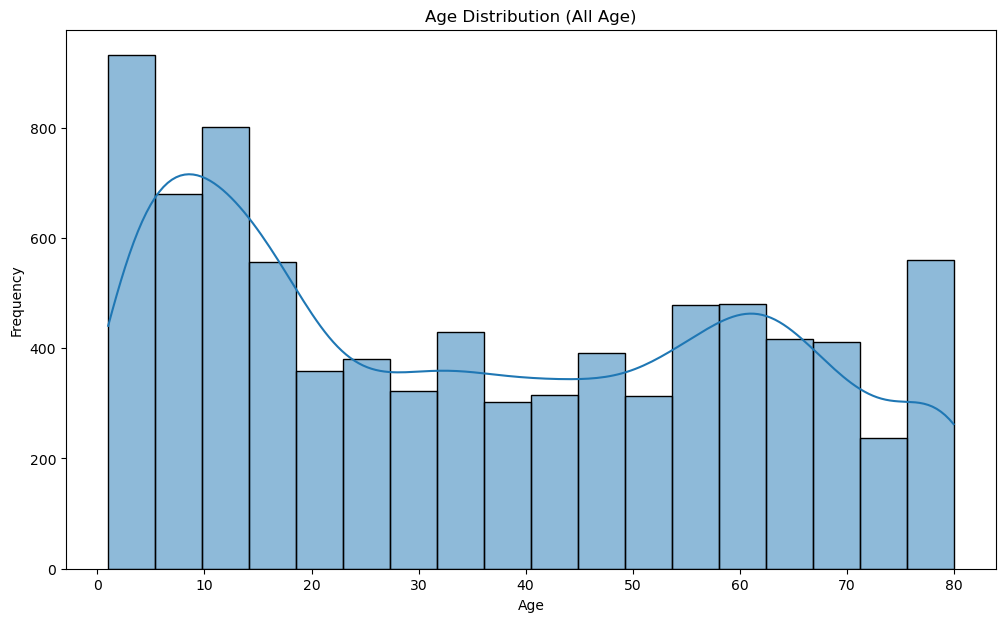

count    8366.000000
mean       35.830026
std        24.905061
min         1.000000
25%        12.000000
50%        33.000000
75%        59.000000
max        80.000000
Name: Age, dtype: float64


c:\Users\75994\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


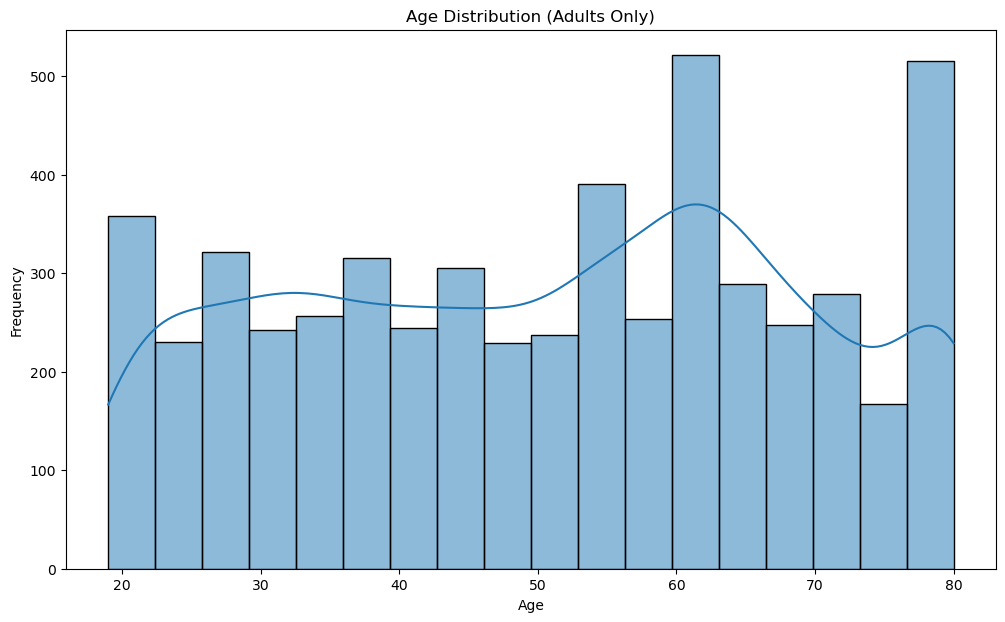

       Column  Missing Rate (%)
0          ID          0.000000
1          DM          0.000000
2         Age          0.000000
3     Smoking          0.000000
4     Alcohol         26.806225
5      Income         13.208596
6          PA         28.640237
7         BMI          1.796962
8        Race          0.000000
9         Edu          2.686180
10  Menopause          0.000000
11   Systolic         11.559837
12  Diastolic         11.559837


In [5]:
# First consider the Age, which is the only continous var in our dataset
age_stats = df['Age'].describe()
df['Age'] = df['Age'].astype(int)

# Here, we first see the distribution before we remove the adolescents from our data set
# Plot histogram for 'Age'
plt.figure(figsize=(12, 7))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution (All Age)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




# filtered the age that is less than
df_adult = df[df['Age'] > 18]
print(age_stats)
# Plot histogram for 'Age'
plt.figure(figsize=(12, 7))
sns.histplot(df_adult['Age'], kde=True)
plt.title('Age Distribution (Adults Only)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



# generate the missing percentage for adult
missing_values_count = df_adult.isnull().sum()
# Calculate the missing rate for each column
missing_rate = (missing_values_count / len(df_adult)) * 100
missing_rate_table = pd.DataFrame({'Column': df_adult.columns, 'Missing Rate (%)': missing_rate}).reset_index(drop=True)
print(missing_rate_table)


In [6]:
# Deal with the BMI by imputing by median
# Calculate the median value for the 'BMI' column
df_adult_noNAFill = df_adult.copy()
median_bmi = df_adult['BMI'].median()
df_adult['BMI'] = df_adult['BMI'].fillna(median_bmi)
# also with Systolic, Diastolic
median_systolic = df_adult['Systolic'].median()
df_adult['Systolic'] = df_adult['Systolic'].fillna(median_systolic)

median_diastolic = df_adult['Diastolic'].median()
df_adult['Diastolic'] = df_adult['Diastolic'].fillna(median_diastolic)


C:\Users\75994\AppData\Local\Temp\ipykernel_15696\2701142783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adult['BMI'] = df_adult['BMI'].fillna(median_bmi)
C:\Users\75994\AppData\Local\Temp\ipykernel_15696\2701142783.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adult['Systolic'] = df_adult['Systolic'].fillna(median_systolic)
C:\Users\75994\AppData\Local\Temp\ipykernel_15696\2701142783.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [7]:
# Here, ID is the observation records which is not used to our imputation process
# DM is the response for us to compute, so we also exclude it from imputing
features_to_impute = df_adult.drop(columns=['ID', 'DM', 'BMI','Systolic','Diastolic'])
# Initialize the IterativeImputer with a RandomForest estimator
imp = IterativeImputer(estimator=RandomForestClassifier(n_estimators=100), max_iter=50, random_state=0)
# Fit the imputer on the data
imp.fit(features_to_impute)
# Transform the data (this performs the imputation)
imputed_data = imp.transform(features_to_impute)

df_imputed = pd.DataFrame(imputed_data, columns=features_to_impute.columns)

c:\Users\75994\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [8]:
df_final = df_adult.copy()
df_imputed.index = df_adult.index
df_final.update(df_imputed)

print(df_final)
print(df_imputed)

df_final.to_csv("T2DM_MissingFilled_FINALVERSION.csv", index=False)

          ID  DM  Age  Smoking  Alcohol  Income   PA   BMI  Race  Edu  \
2      93705   2   66      1.0      1.0     1.0  0.0  31.7   2.0  1.0   
5      93708   3   66      0.0      0.0     2.0  1.0  23.7   4.0  1.0   
6      93709   2   75      2.0      1.0     1.0  1.0  38.9   2.0  3.0   
7      93711   2   56      0.0      1.0     3.0  1.0  21.3   4.0  4.0   
9      93713   2   67      2.0      2.0     2.0  1.0  23.5   1.0  2.0   
...      ...  ..  ...      ...      ...     ...  ...   ...   ...  ...   
8359  102949   2   33      2.0      0.0     1.0  1.0  23.7   1.0  2.0   
8361  102952   3   70      0.0      0.0     1.0  1.0  20.0   4.0  2.0   
8362  102953   2   42      1.0      3.0     2.0  1.0  35.8   3.0  2.0   
8363  102954   2   41      0.0      0.0     1.0  0.0  26.1   2.0  4.0   
8365  102956   2   38      2.0      1.0     2.0  1.0  36.1   1.0  3.0   

      Menopause  Systolic  Diastolic  
2           1.0     124.0       72.0  
5           1.0     124.0       72.0  
6     

### Chi-Square Test (χ²)

- **Purpose**: The Chi-square test is used to determine whether there's a significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table.

- **Formula**: 
χ² = Σ((O - E)² / E)

Where `O` represents the observed frequency, and `E` is the expected frequency.

- **Interpretation**: A high χ² value suggests that the differences between the observed and expected data are greater than what would be expected by chance, allowing us to reject the null hypothesis of independence between categorical variables (or the hypothesis that the distributions are the same).

### Cramer's V

- **Purpose**: Cramer's V is a measure derived from the Chi-square statistic that provides a quantitative measure of the strength of association between two nominal variables.

- **Formula**: 
V = √(χ² / (n * min(r-1, c-1)))

Where `n` is the total number of observations, `r` is the number of rows in the table, and `c` is the number of columns.

- **Interpretation**: Cramer's V ranges from 0 to 1, where 0 indicates no association between variables, and 1 indicates a strong association. It helps to understand how strongly two categorical variables are related or how closely the imputed data matches the original data's distribution, normalized by the sizes of the dataset and the table dimensions.


Smoking:
         Before Imputation (%)  After Imputation (%)
Smoking                                             
0.0                  58.762505             58.762505
1.0                  23.323453             23.323453
2.0                  17.914042             17.914042

Alcohol:
         Before Imputation (%)  After Imputation (%)
Alcohol                                             
0.0                   9.966654             12.930715
1.0                  39.607262             56.706187
2.0                  16.413486             21.193034
3.0                   7.206373              9.170063
NaN                  26.806225                   NaN

Income:
        Before Imputation (%)  After Imputation (%)
Income                                             
1.0                 25.361245             29.585031
2.0                 35.568729             41.385698
3.0                 25.861430             29.029270
NaN                 13.208596                   NaN

PA:
     Before Imputat

c:\Users\75994\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\75994\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


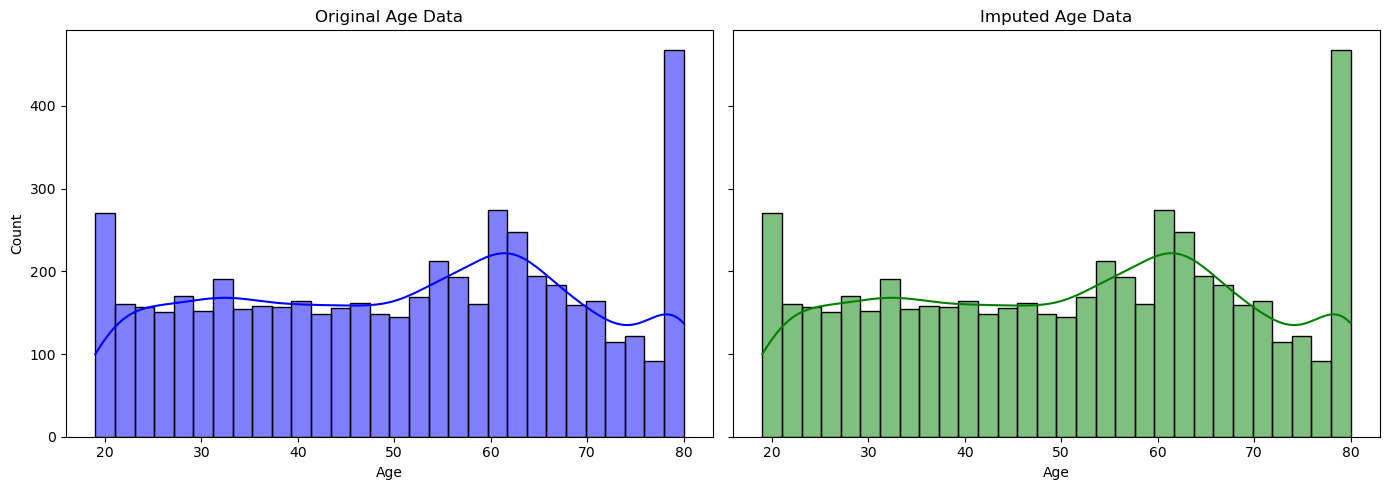

KS Test for Age: Statistic=0.00, p-value=1.000
Conclusion: No significant difference, imputation likely reasonable.


c:\Users\75994\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\75994\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


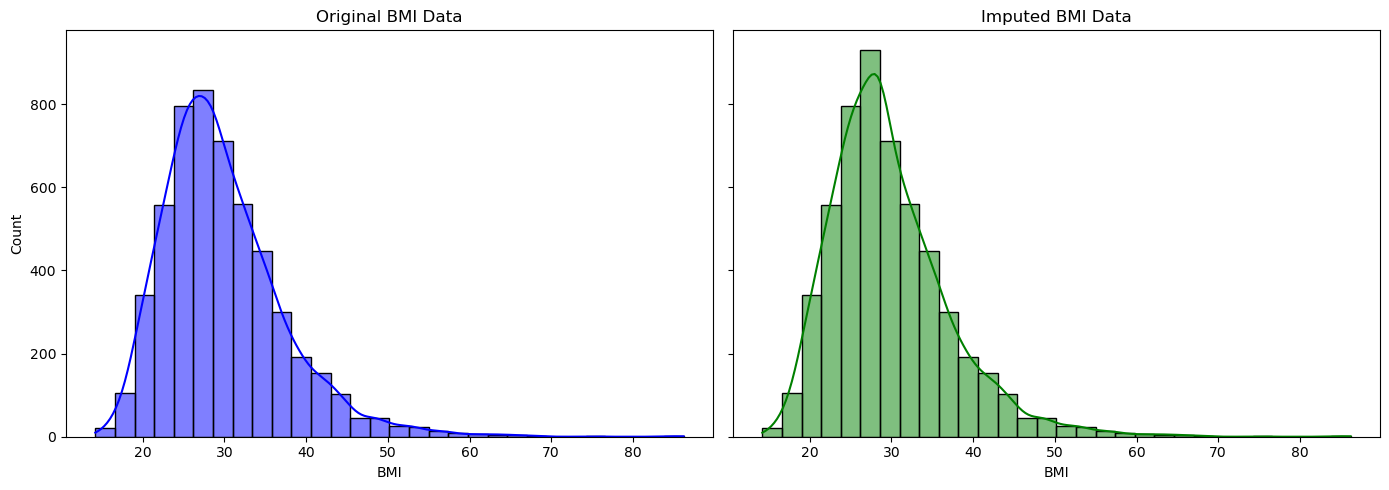

KS Test for BMI: Statistic=0.01, p-value=0.981
Conclusion: No significant difference, imputation likely reasonable.


c:\Users\75994\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\75994\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


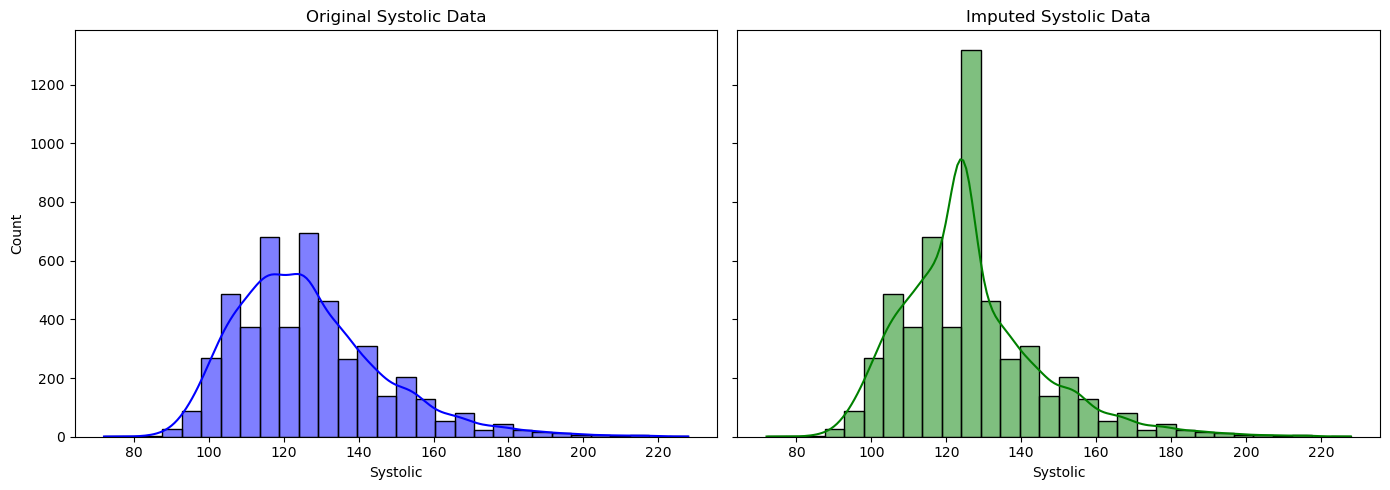

KS Test for Systolic: Statistic=0.06, p-value=0.000
Conclusion: Significant difference.


c:\Users\75994\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\75994\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


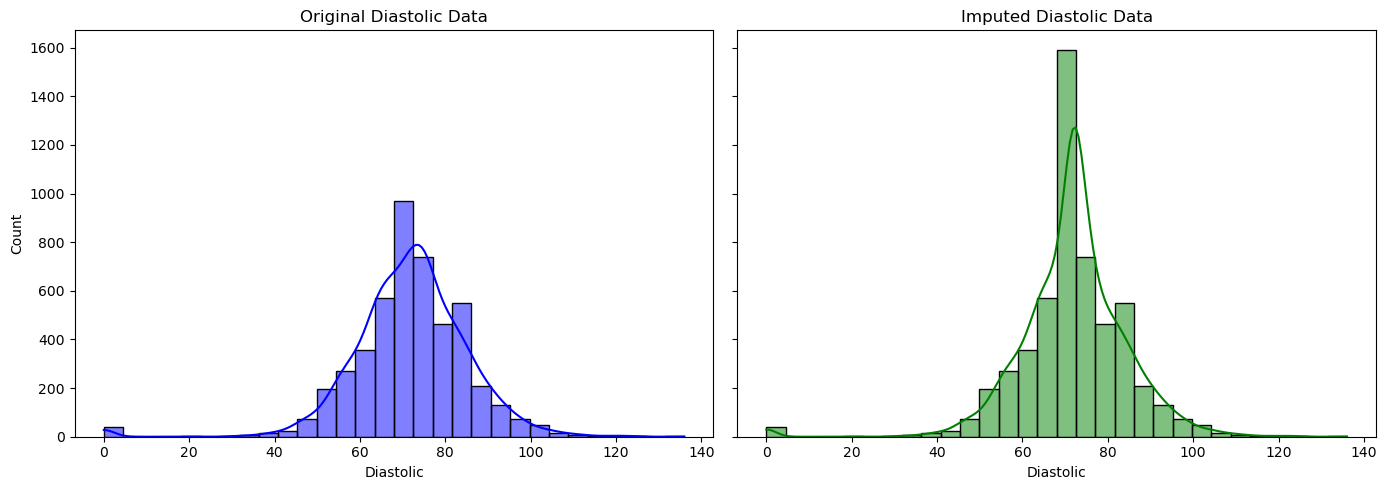

KS Test for Diastolic: Statistic=0.05, p-value=0.000
Conclusion: Significant difference.


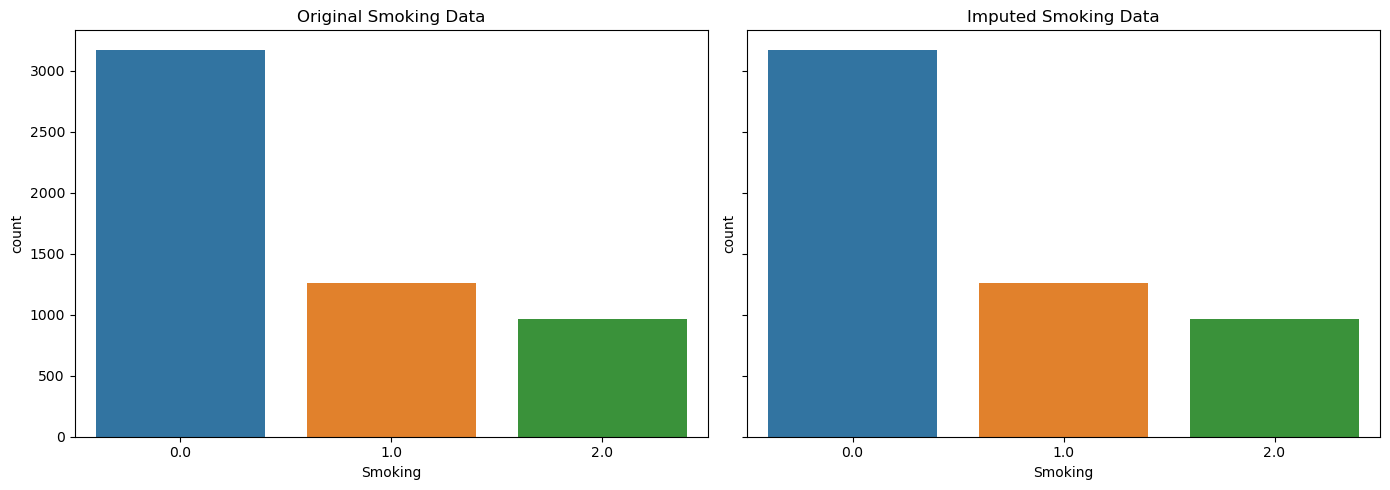

Chi-squared test for Smoking: χ²=0.00, p=1.000, Cramer's V=0.00
Conclusion: No significant difference, imputation likely reasonable.


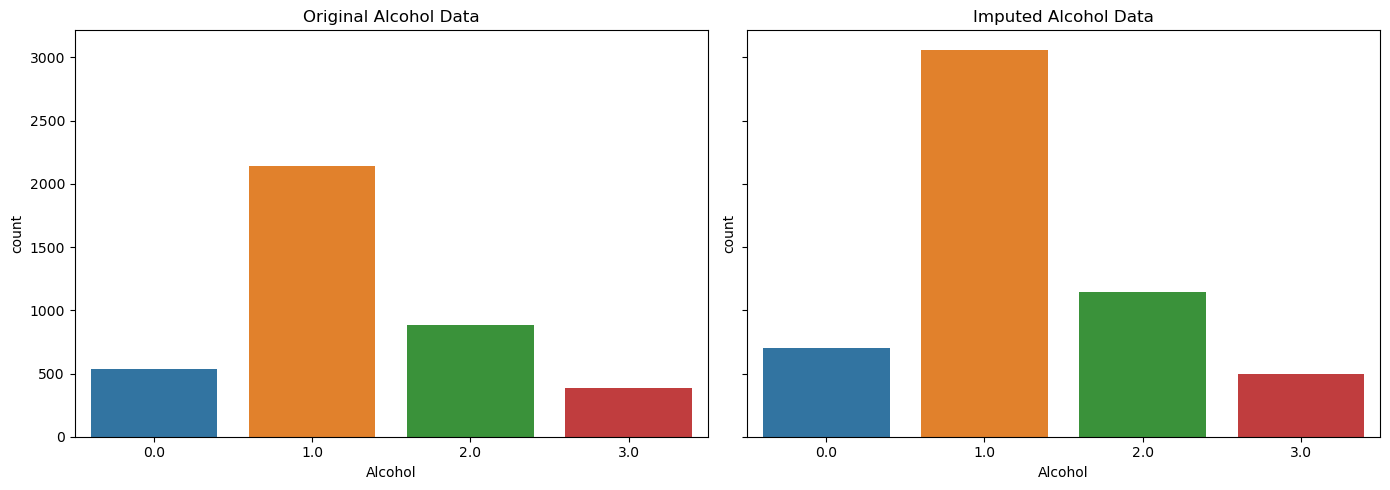

Chi-squared test for Alcohol: χ²=6.27, p=0.099, Cramer's V=0.03
Conclusion: No significant difference, imputation likely reasonable.


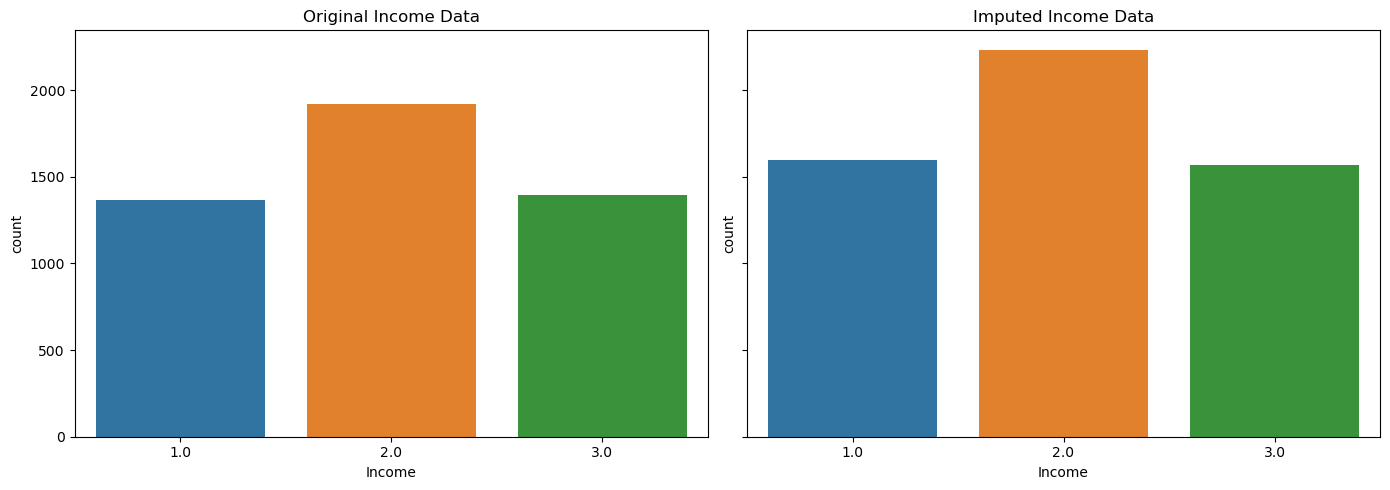

Chi-squared test for Income: χ²=0.72, p=0.699, Cramer's V=0.01
Conclusion: No significant difference, imputation likely reasonable.


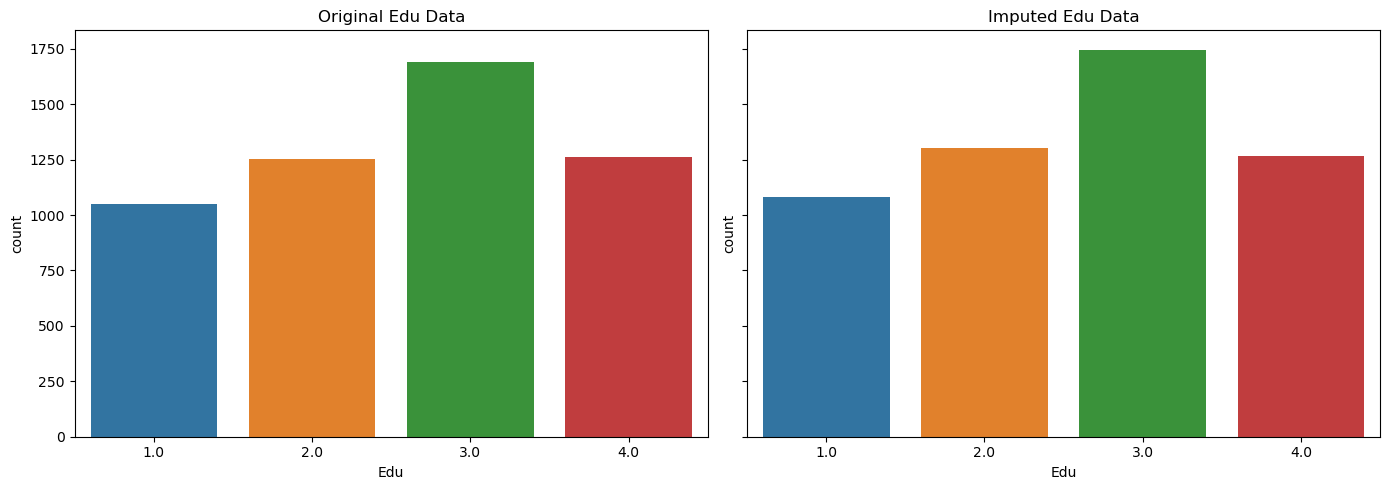

Chi-squared test for Edu: χ²=0.50, p=0.918, Cramer's V=0.01
Conclusion: No significant difference, imputation likely reasonable.


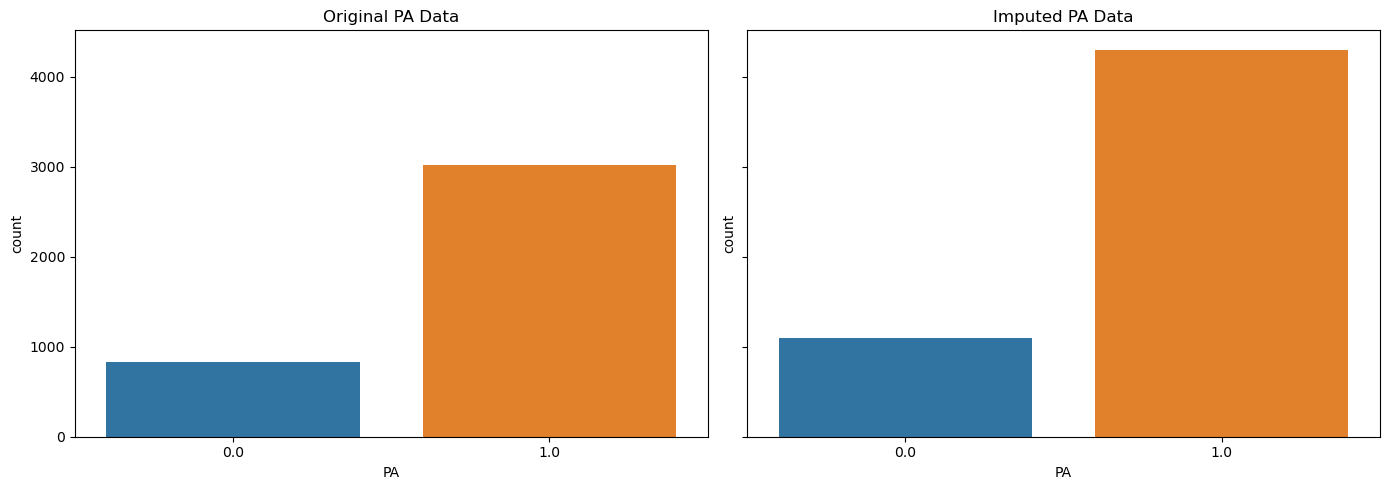

Chi-squared test for PA: χ²=2.35, p=0.125, Cramer's V=0.02
Conclusion: No significant difference, imputation likely reasonable.


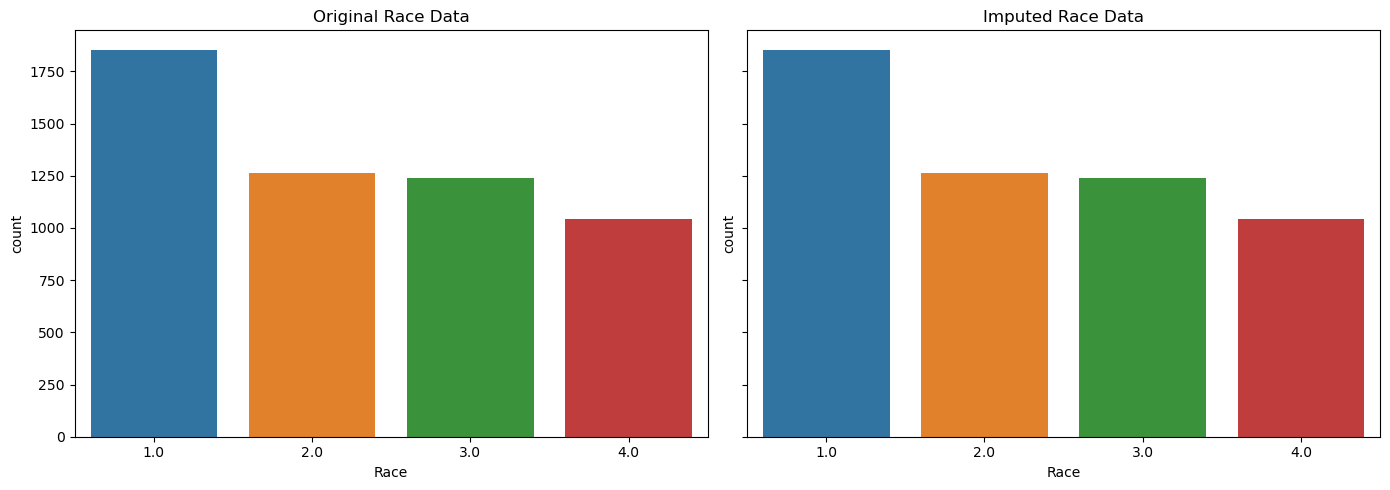

Chi-squared test for Race: χ²=0.00, p=1.000, Cramer's V=0.00
Conclusion: No significant difference, imputation likely reasonable.


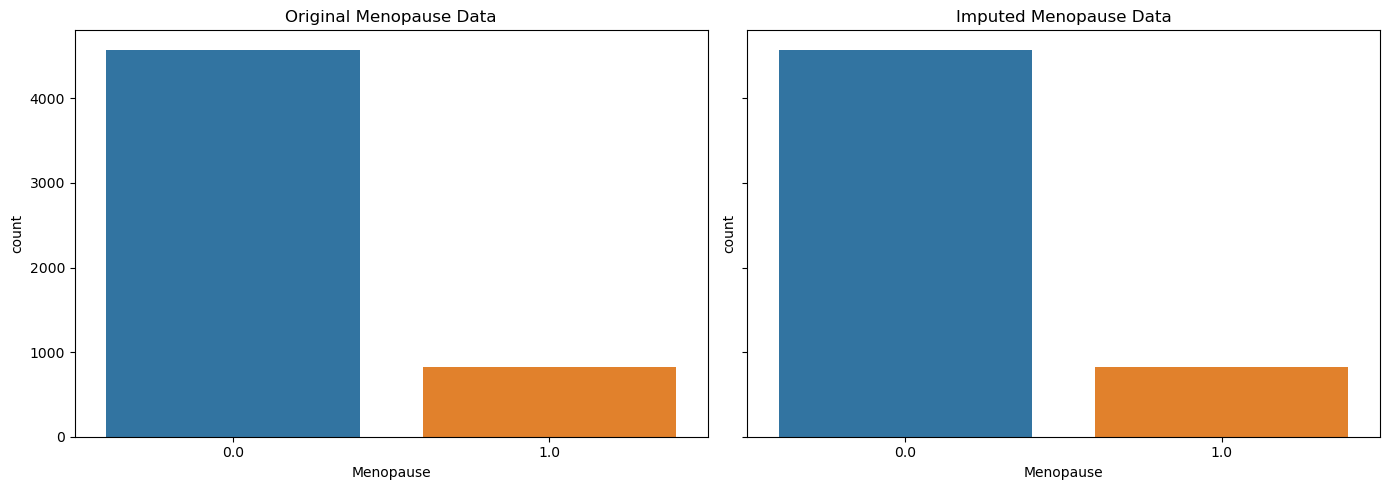

Chi-squared test for Menopause: χ²=0.00, p=1.000, Cramer's V=0.00
Conclusion: No significant difference, imputation likely reasonable.


c:\Users\75994\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\75994\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\75994\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\75994\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

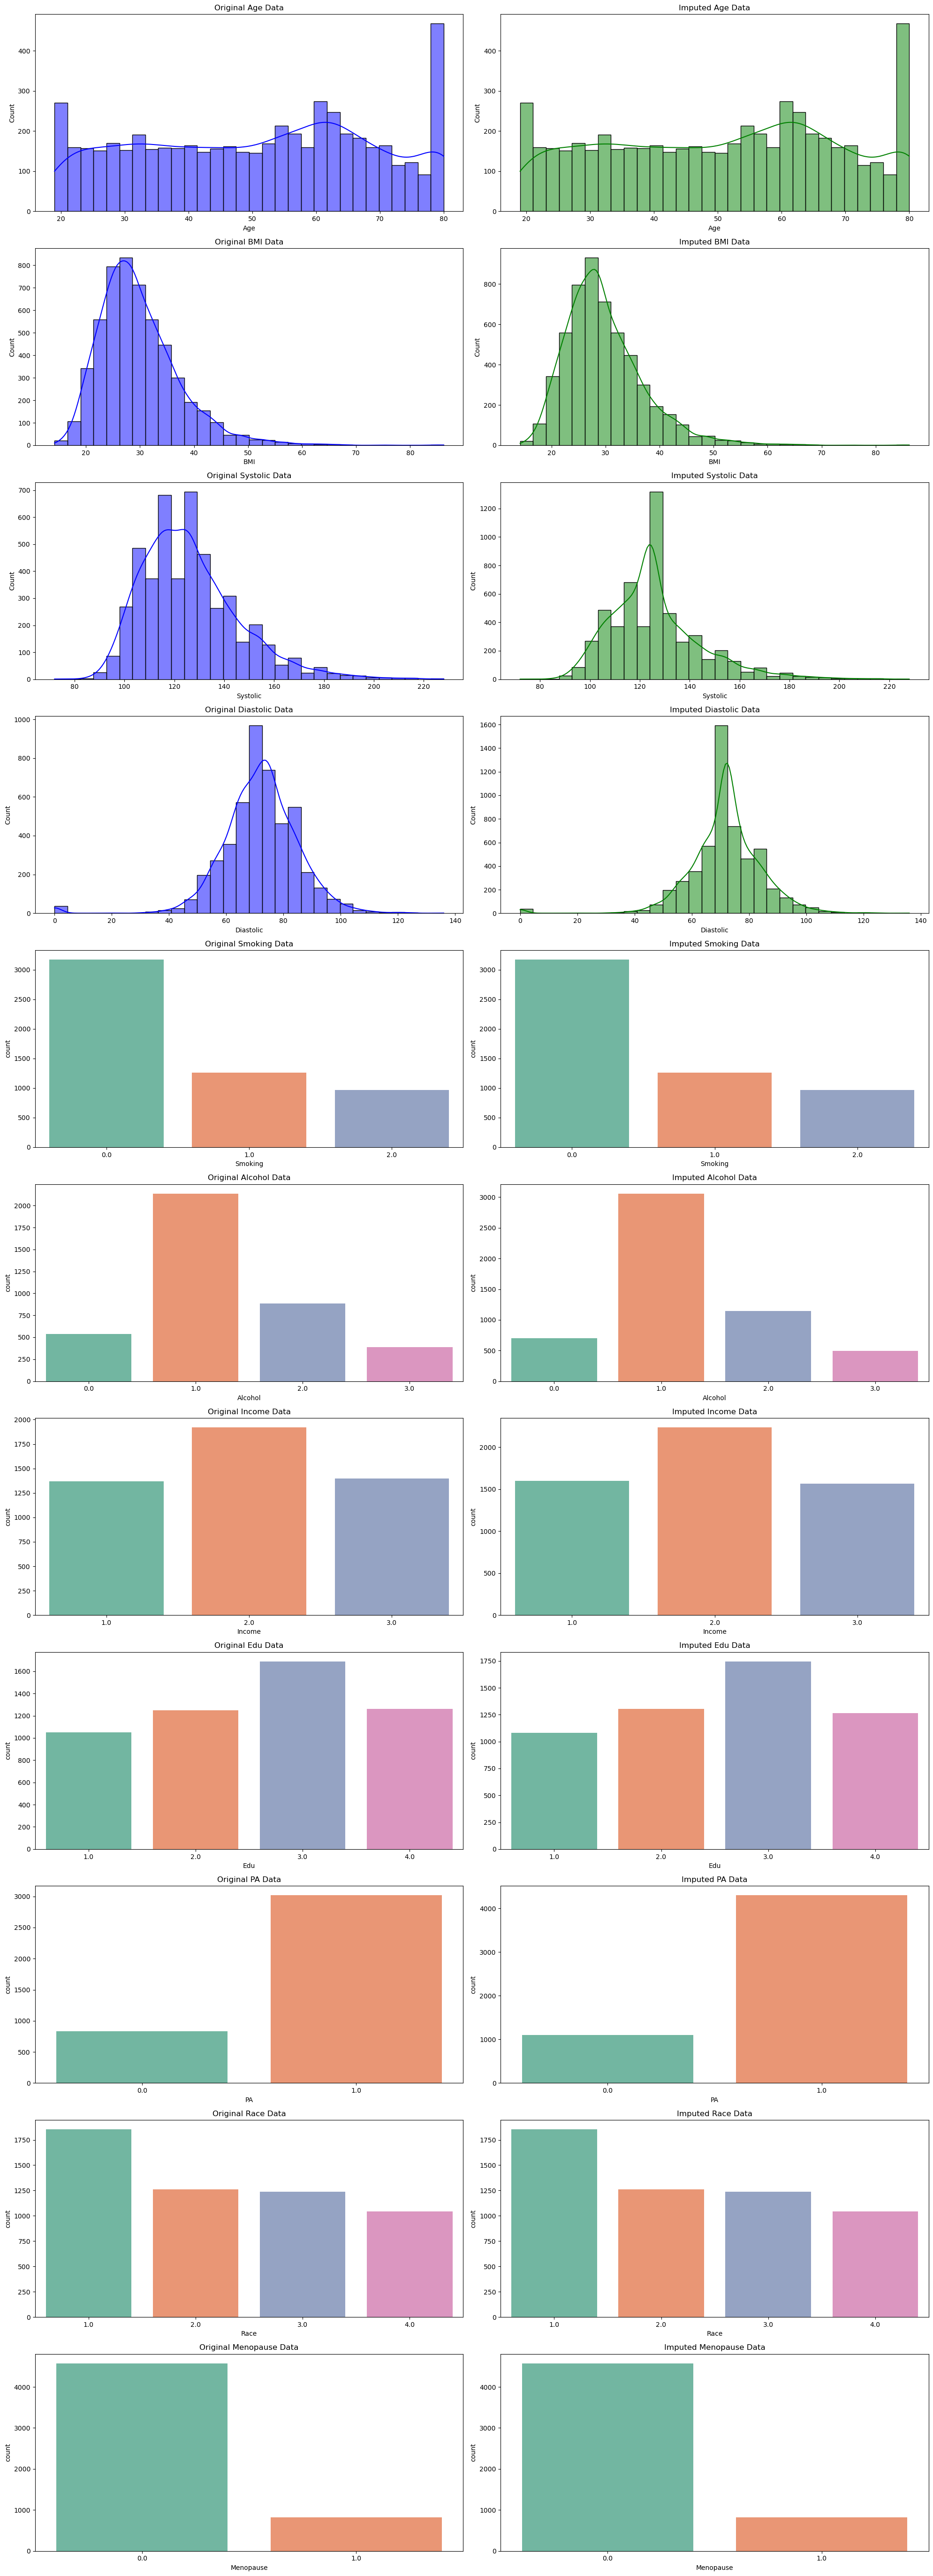

In [9]:
# Function to plot the distribution of a categorical/ordinal variable
def plot_continuous_distribution(df_original, df_imputed, column):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    sns.histplot(df_original[column], ax=ax[0], kde=True, bins=30, color='blue')
    ax[0].set_title(f'Original {column} Data')

    sns.histplot(df_imputed[column], ax=ax[1], kde=True, bins=30, color='green')
    ax[1].set_title(f'Imputed {column} Data')

    plt.tight_layout()
    plt.show()

def plot_categorical_distribution(df_original, df_imputed, column):
    # Determine the order based on the combined data from both dataframes
    combined_categories = pd.concat([df_original[column], df_imputed[column]]).dropna().unique()
    sorted_order = np.sort(combined_categories) 

    fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    # Use the sorted order for both plots
    sns.countplot(x=column, data=df_original, ax=ax[0], order=sorted_order)
    ax[0].set_title(f'Original {column} Data')

    sns.countplot(x=column, data=df_imputed, ax=ax[1], order=sorted_order)
    ax[1].set_title(f'Imputed {column} Data')

    plt.tight_layout()
    plt.show()

def calculate_value_percentages(df_original, df_imputed, columns):
    result = {}
    for column in columns:
        before = df_original[column].value_counts(dropna=False, normalize=True) * 100
        after = df_imputed[column].value_counts(dropna=False, normalize=True) * 100
        result[column] = pd.DataFrame({'Before Imputation (%)': before, 'After Imputation (%)': after})
    return result

def ks_test_for_continuous(df_original, df_imputed, column):
    # Get the data for both original and imputed datasets
    data_original = df_original[column].dropna()
    data_imputed = df_imputed[column].dropna()

    # Perform KS test
    statistic, p_value = ks_2samp(data_original, data_imputed)
    print(f"KS Test for {column}: Statistic={statistic:.2f}, p-value={p_value:.3f}")

    # Adding a conclusion in the same print statement for conciseness
    if p_value > 0.05:
        print("Conclusion: No significant difference, imputation likely reasonable.")
    else:
        print("Conclusion: Significant difference.")


def chi_squared_test(df_original, df_imputed, column):
    # Get value counts for both original and imputed data, including all possible categories
    all_categories = pd.concat([df_original[column], df_imputed[column]]).dropna().unique()
    observed = df_original[column].value_counts(dropna=False).reindex(all_categories, fill_value=0)
    imputed = df_imputed[column].value_counts(dropna=False).reindex(all_categories, fill_value=0)

    # Construct the contingency table
    contingency_table = np.array([observed, imputed])

    # Run the chi-squared test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    # Calculate Cramer's V for effect size
    n = contingency_table.sum()
    cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    
    print(f"Chi-squared test for {column}: χ²={chi2:.2f}, p={p:.3f}, Cramer's V={cramer_v:.2f}")

    # Adding a conclusion in the same print statement for conciseness
    if p > 0.05:
        print("Conclusion: No significant difference, imputation likely reasonable.")
    else:
        # We choose 0.15 to be minor significance
        conclusion = "minor significance." if cramer_v < 0.15 else "strong significance."
        print(f"Conclusion: Significant difference with {conclusion}")

continuous_columns = ['Age', 'BMI', 'Systolic', 'Diastolic'] 
ordinal_columns = ['Smoking', 'Alcohol', 'Income', 'Edu']
categorical_columns = ['PA', 'Race', 'Menopause']

columns_to_analyze = ['Smoking', 'Alcohol', 'Income', 'PA', 'BMI', 'Race', 'Edu', 'Menopause','Systolic','Diastolic'] 
percentages = calculate_value_percentages(df_adult, df_final, columns_to_analyze)
for column, data in percentages.items():
    print(f"{column}:\n{data}\n")

for column in continuous_columns:
    plot_continuous_distribution(df_adult_noNAFill, df_final, column)
    ks_test_for_continuous(df_adult_noNAFill, df_final, column)

for column in ordinal_columns:
    plot_categorical_distribution(df_adult, df_final, column)
    chi_squared_test(df_adult, df_final, column)

for column in categorical_columns:
    plot_categorical_distribution(df_adult, df_final, column)
    chi_squared_test(df_adult, df_final, column)


def plot_all_distributions(df_original, df_imputed, df_noNAfill, continuous_columns, ordinal_columns, categorical_columns):
    total_vars = len(continuous_columns) + len(ordinal_columns) + len(categorical_columns)
    total_rows = (total_vars + 1) // 2  # Ensuring enough rows for all variables
    fig, axes = plt.subplots(total_rows, 4, figsize=(20, 5 * total_rows))  # Each variable has two plots, original and imputed next to each other, two sets per row

    index = 0  # This tracks the current plot position in the figure
    for column in continuous_columns + ordinal_columns + categorical_columns:
        # Determine the correct dataframe for continuous columns
        if column in continuous_columns:
            data_original = df_noNAfill
        else:
            data_original = df_original

        # Calculate position in the grid
        row = index // 2
        col = (index % 2) * 2

        # Define colors or palette based on variable type
        if column in continuous_columns:
            color_original = 'blue'
            color_imputed = 'green'
        else:
            # Get unique categories for color consistency across original and imputed data
            unique_categories = pd.concat([data_original[column], df_imputed[column]]).dropna().unique()
            palette = sns.color_palette("Set2", len(unique_categories))  # Using Set2 for a more appealing look
            color_mapping = {cat: palette[i] for i, cat in enumerate(sorted(unique_categories))}

        # Plot original data
        if column in continuous_columns:
            sns.histplot(data_original[column], ax=axes[row, col], kde=True, bins=30, color=color_original)
        else:
            sns.countplot(x=column, data=data_original, ax=axes[row, col], palette=color_mapping)
        axes[row, col].set_title(f'Original {column} Data')

        # Plot imputed data
        if column in continuous_columns:
            sns.histplot(df_imputed[column], ax=axes[row, col + 1], kde=True, bins=30, color=color_imputed)
        else:
            sns.countplot(x=column, data=df_imputed, ax=axes[row, col + 1], palette=color_mapping)
        axes[row, col + 1].set_title(f'Imputed {column} Data')

        index += 1  # Move to the next pair of plots

    # Remove any unused axes
    for j in range(index, total_rows * 2):
        row = j // 2
        col = (j % 2) * 2
        fig.delaxes(axes[row, col])
        if col + 1 < 4:
            fig.delaxes(axes[row, col + 1])

    plt.tight_layout()
    plt.show()

# Example usage
plot_all_distributions(df_adult, df_final, df_adult_noNAFill, continuous_columns, ordinal_columns, categorical_columns)

To see whether the imputation captures the correlation and covariance between our features, we do the following:
### Pearson Correlation Coefficient

- **Purpose**: The Pearson correlation coefficient measures the linear relationship between two continuous variables. It quantifies both the direction and the strength of this relationship.


### Spearman's Rank Correlation Coefficient

- **Purpose**: Spearman's rank correlation is a non-parametric measure that assesses how well the relationship between two variables can be described using a monotonic function. It does not assume a linear relationship or normality. (Which seems to be more reasonable to our cases)

- **Calculation**: $\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}$

Where $d_i$ is the difference between the ranks of corresponding values of the two variables, and $n$ is the number of observations.


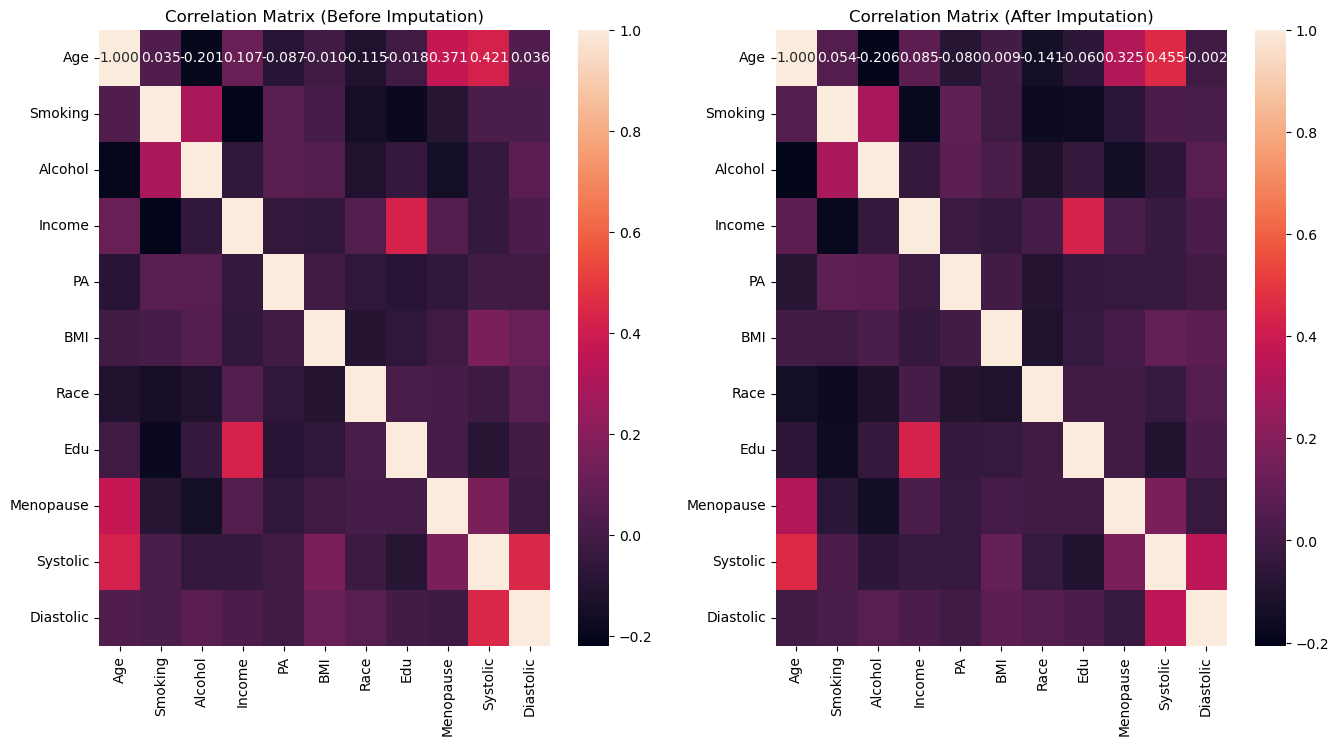

The average absolute difference in Pearson correlation coefficients is: 0.005
Minor changes in correlations suggest that imputation has preserved the underlying relationships well.


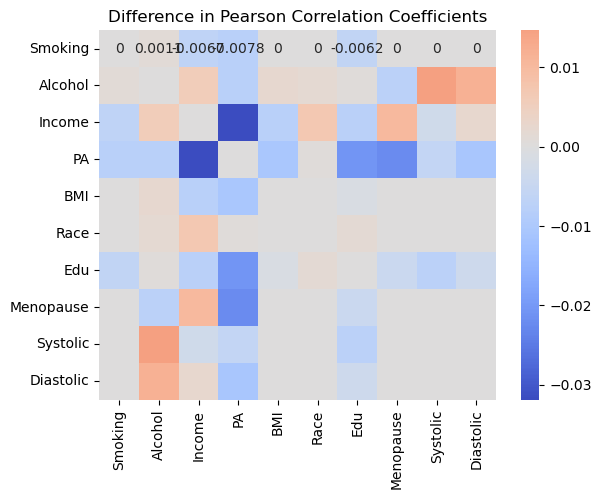

In [10]:
# Calculate correlation matrices
corr_before = df_adult.drop(['ID', 'DM'], axis=1).dropna().corr() 
corr_after = df_final.drop(['ID', 'DM'], axis=1).corr()

# Plot the correlation matrices
plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.heatmap(corr_before, annot=True, fmt=".3f")
plt.title('Correlation Matrix (Before Imputation)')

plt.subplot(122)
sns.heatmap(corr_after, annot=True, fmt=".3f")
plt.title('Correlation Matrix (After Imputation)')
plt.show()

# We can also use pearson
def correlation_stability(df_original, df_imputed, columns):
    # Calculate correlation matrices
    corr_original = df_original[columns].corr(method='pearson')
    corr_imputed = df_imputed[columns].corr(method='pearson')
    
    # Calculate the difference in correlation coefficients
    corr_diff = corr_original - corr_imputed
    
    # Calculate the average absolute difference
    average_diff = corr_diff.abs().mean().mean()
    print(f"The average absolute difference in Pearson correlation coefficients is: {average_diff:.3f}")

    # Define thresholds for significance of differences
    if average_diff < 0.1:
        conclusion = "Minor changes in correlations suggest that imputation has preserved the underlying relationships well."
    elif average_diff < 0.3:
        conclusion = "Moderate changes in correlations suggest some potential alterations in relationships due to imputation."
    else:
        conclusion = "Major changes in correlations indicate significant alterations in relationships, which may impact subsequent analyses."

    # Print out the conclusion
    print(conclusion)
    
    return corr_diff

# Assuming 'df' is your original DataFrame and 'df_imputed' is the DataFrame after imputation
# and 'columns' is a list of columns for which you want to check the correlation stability
corr_diff = correlation_stability(df_adult, df_final, columns_to_analyze)

# Visualize the difference in correlation coefficients
sns.heatmap(corr_diff, annot=True, cmap='coolwarm', center=0)
plt.title('Difference in Pearson Correlation Coefficients')
plt.show()


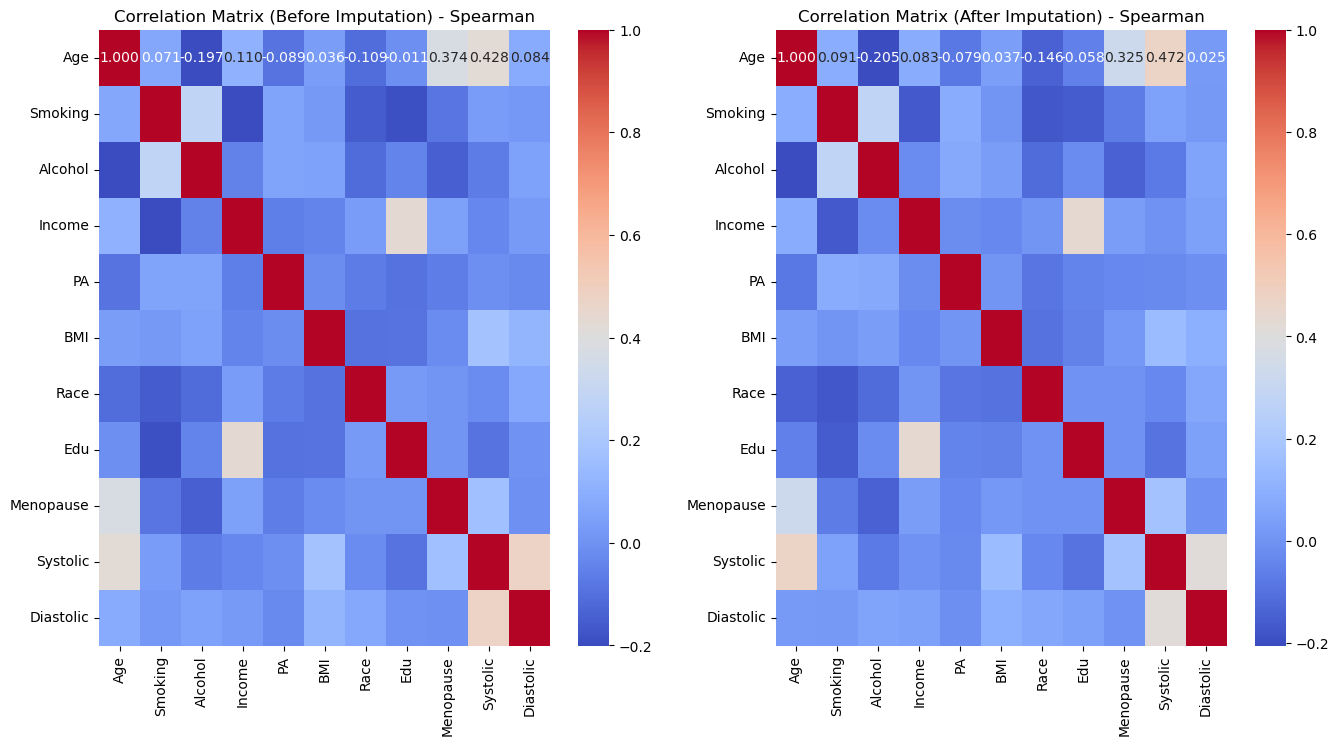

The average absolute difference in Spearman correlation coefficients is: 0.005
Minor changes in correlations suggest that imputation has preserved the underlying relationships well.


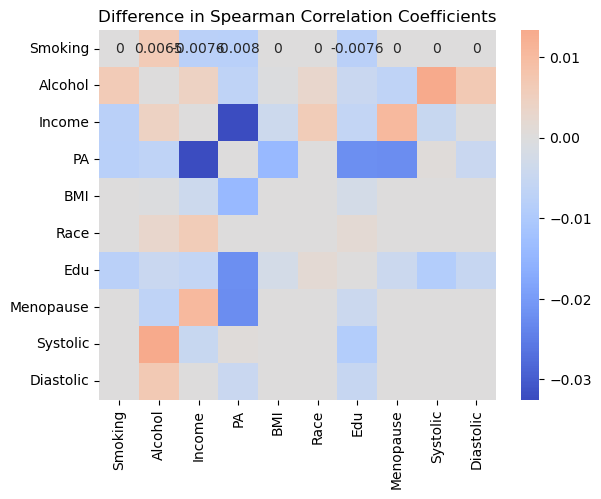

In [11]:
# Calculate correlation matrices using Spearman's method
corr_before = df_adult.drop(['ID', 'DM'], axis=1).dropna().corr(method='spearman') 
corr_after = df_final.drop(['ID', 'DM'], axis=1).corr(method='spearman')

# Plot the correlation matrices
plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.heatmap(corr_before, annot=True, fmt=".3f", cmap='coolwarm')
plt.title('Correlation Matrix (Before Imputation) - Spearman')

plt.subplot(122)
sns.heatmap(corr_after, annot=True, fmt=".3f", cmap='coolwarm')
plt.title('Correlation Matrix (After Imputation) - Spearman')
plt.show()

# Function to evaluate correlation stability using Spearman's correlation
def correlation_stability(df_original, df_imputed, columns):
    # Calculate correlation matrices using Spearman's method
    corr_original = df_original[columns].corr(method='spearman')
    corr_imputed = df_imputed[columns].corr(method='spearman')
    
    # Calculate the difference in correlation coefficients
    corr_diff = corr_original - corr_imputed
    
    # Calculate the average absolute difference
    average_diff = corr_diff.abs().mean().mean()
    print(f"The average absolute difference in Spearman correlation coefficients is: {average_diff:.3f}")

    # Define thresholds for significance of differences
    if average_diff < 0.1:
        conclusion = "Minor changes in correlations suggest that imputation has preserved the underlying relationships well."
    elif average_diff < 0.3:
        conclusion = "Moderate changes in correlations suggest some potential alterations in relationships due to imputation."
    else:
        conclusion = "Major changes in correlations indicate significant alterations in relationships, which may impact subsequent analyses."

    # Print out the conclusion
    print(conclusion)
    
    return corr_diff

# Assuming 'columns_to_analyze' is a list of columns for which you want to check the correlation stability
corr_diff = correlation_stability(df_adult, df_final, columns_to_analyze)

# Visualize the difference in correlation coefficients
sns.heatmap(corr_diff, annot=True, cmap='coolwarm', center=0)
plt.title('Difference in Spearman Correlation Coefficients')
plt.show()

# Plot Generating
Here, we write code to see the number of DM grouped by each of the feature we used...

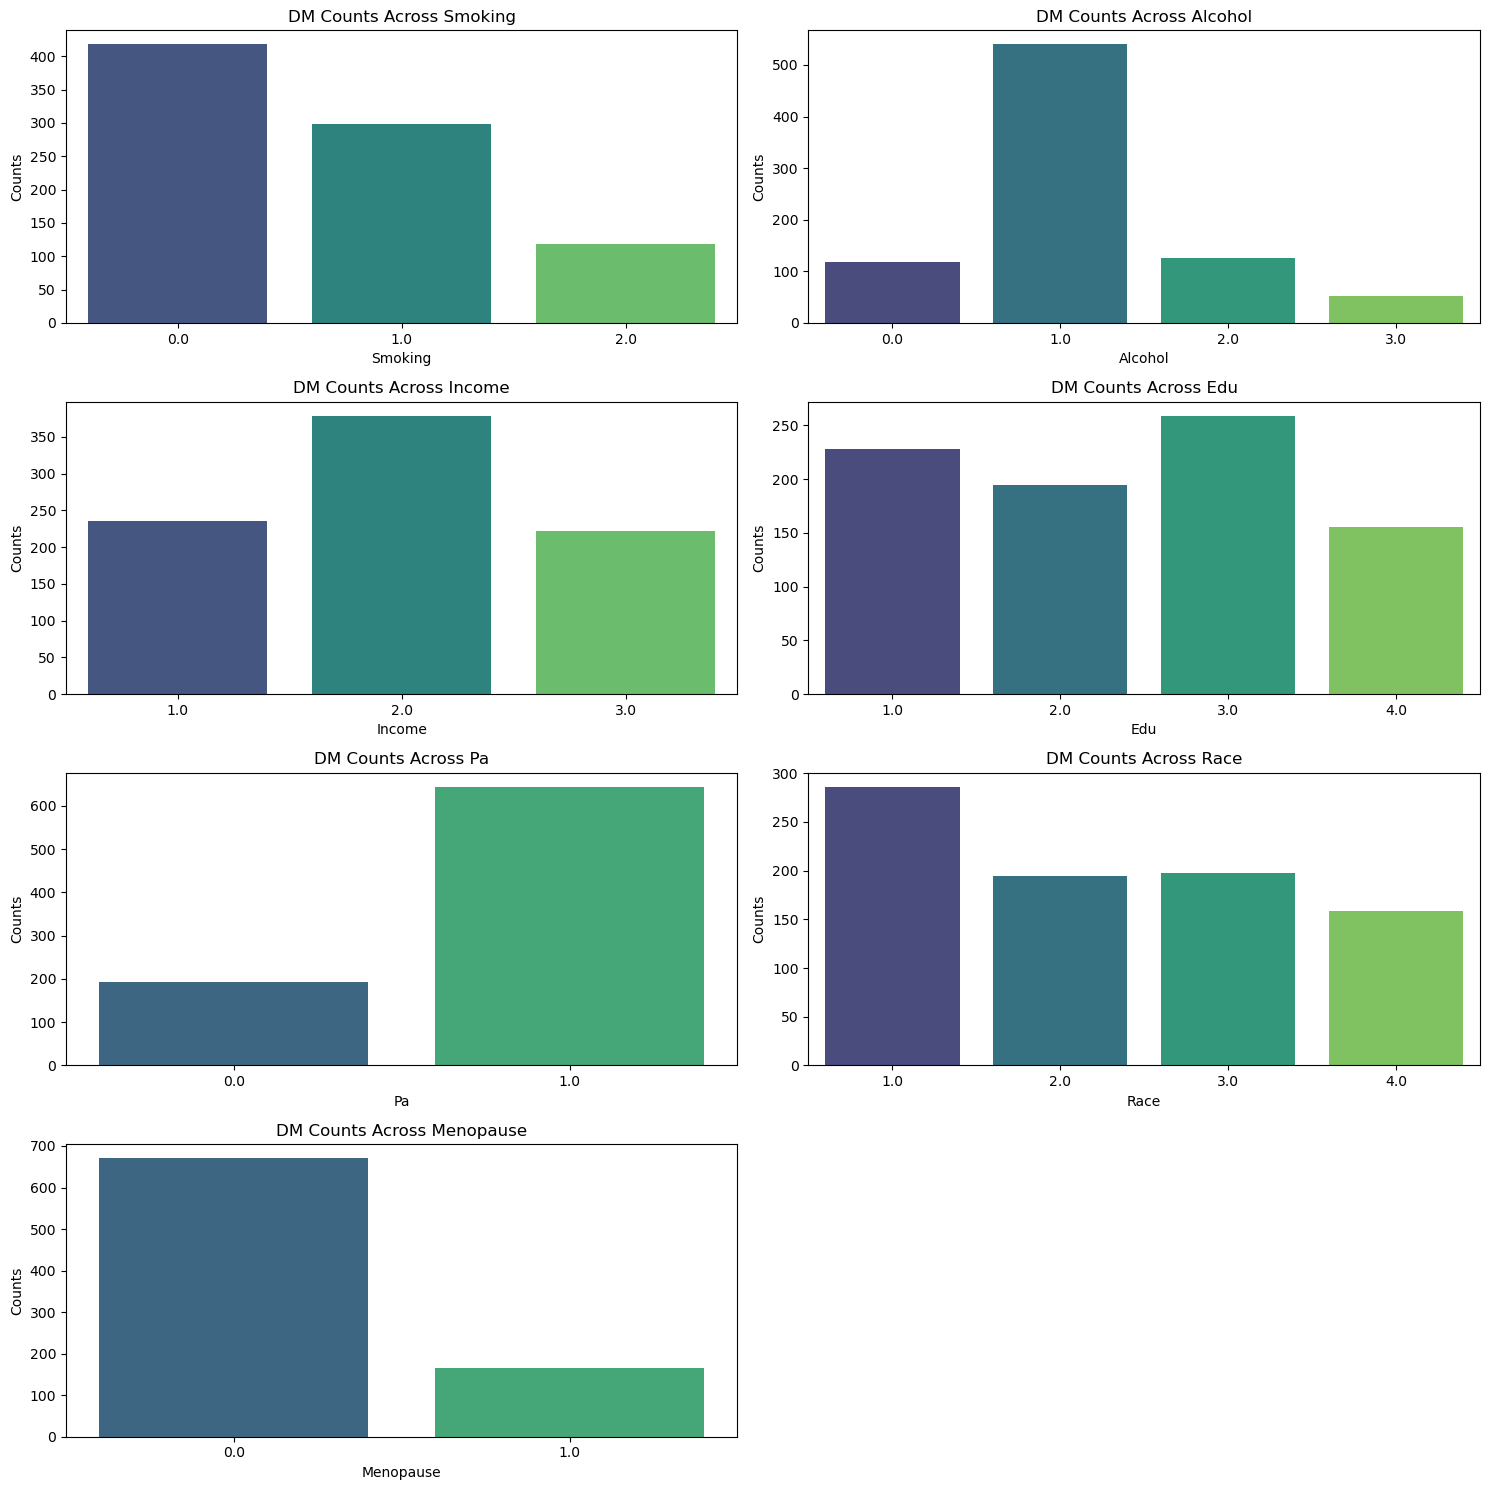

In [12]:
df_HASDM = df_final[df_final['DM'] == 1]
categorical_columns = ['Smoking', 'Alcohol', 'Income', 'Edu', 'PA', 'Race', 'Menopause']


fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15)) 
axs = axs.flatten()
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df_HASDM, ax=axs[i], palette='viridis')
    axs[i].set_title(f'DM Counts Across {column.title()}')
    axs[i].set_xlabel(column.title())
    axs[i].set_ylabel('Counts')
    axs[i].tick_params(axis='x') 

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()